**Impact of Social Media Marketing on Consumer Buying Decisions**

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer

# Pre-Processing

In [ ]:
# Datafile
from google.colab import files
uploaded = files.upload()

Saving Impact of Social Media Marketing on Consumer Buying Decisions (Responses).csv to Impact of Social Media Marketing on Consumer Buying Decisions (Responses).csv


In [ ]:
socmed_df = pd.read_csv('Impact of Social Media Marketing on Consumer Buying Decisions (Responses).csv')
socmed_df.head()

,Timestamp,Gender,Age,Occupation,Monthly Income (if applicable),Social Media Platforms You Use Regularly (tick all that apply),How many hours per day do you spend on social media?,Do you follow brands or businesses on social media?,How often do you see product advertisements or promotions on social media?,How likely are you to trust product recommendations from Influencers:,...,Influencer recommendations affect my decision to buy a product.,I have more confidence to buy when I see positive reviews on social media.,"Social media promotions (e.g., discounts, giveaways) encourage me to buy.",I usually follow brands or businesses on social media.,Seeing many likes/comments on a product post increases my trust in it.,How often do you buy products promoted on social media?,Which type of social media content influences you most?,Do you read reviews or comments before buying a product promoted on social media?,"Do you check other sources (e.g., website, other social media) before buying a product promoted on social media?",Have you ever regretted buying a product because of misleading social media marketing?
0,5/13/2025 10:49:13,Female,18 – 24,Student,Below RM1000,"Facebook, Instagram, TikTok, X (Twitter), YouTube",More than 4 hours,Yes,Occasionally,Neutral,...,Strongly Agree,Agree,Agree,Agree,Agree,Often,"Influencer posts, Friends’ recommendations/sha...",Yes,Sometimes,Yes
1,5/13/2025 13:13:54,Male,25 – 34,Employed,RM5000 – RM6999,"Instagram, TikTok, X (Twitter), YouTube",3 – 4 hours,Yes,Very frequently,Unlikely,...,Agree,Agree,Agree,Agree,Agree,Sometimes,Organic posts by brands,Yes,Sometimes,Yes
2,5/13/2025 14:20:41,Male,25 – 34,Employed,RM3000 – RM4999,"Facebook, Instagram, TikTok, YouTube",1 – 2 hours,Yes,Occasionally,Unlikely,...,Disagree,Agree,Agree,Agree,Agree,Rarely,"Sponsored ads, Friends’ recommendations/shares...",Yes,Yes,No
3,5/14/2025 8:41:59,Male,25 – 34,Employed,RM3000 – RM4999,"Facebook, Instagram, TikTok",3 – 4 hours,Yes,Occasionally,Likely,...,Strongly Agree,Agree,Agree,Agree,Agree,Rarely,"Influencer posts, Friends’ recommendations/sha...",Yes,Yes,Yes
4,5/14/2025 9:50:46,Female,25 – 34,Employed,RM3000 – RM4999,"X (Twitter), YouTube",More than 4 hours,No,Very frequently,Very unlikely,...,Strongly Disagree,Agree,Agree,Agree,Agree,Rarely,"Friends’ recommendations/shares, User reviews/...",Yes,Yes,Yes


In [ ]:
socmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 23 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Timestamp                                                                                                         135 non-null    object
 1   Gender                                                                                                            135 non-null    object
 2   Age                                                                                                               135 non-null    object
 3   Occupation                                                                                                        135 non-null    object
 4   Monthly Income (if applicable)        

In [ ]:
#Check NULL values
print(f'Null values: {socmed_df.isnull().sum()}')

Null values: Timestamp                                                                                                           0
Gender                                                                                                              0
Age                                                                                                                 0
Occupation                                                                                                          0
Monthly Income (if applicable)                                                                                      0
Social Media Platforms You Use Regularly (tick all that apply)                                                      0
How many hours per day do you spend on social media?                                                                0
Do you follow brands or businesses on social media?                                                                 0
How often do you see product advertisements

In [ ]:
# Mode Imputation

ord_null_cols = [
    'I have more confidence to buy when I see positive reviews on social media.',
    'Social media promotions (e.g., discounts, giveaways) encourage me to buy.',
    'I usually follow brands or businesses on social media.',
    'Seeing many likes/comments on a product post increases my trust in it.'
]

for col in ord_null_cols:
    mode_val = socmed_df[col].mode()[0]
    socmed_df[col] = socmed_df[col].fillna(mode_val)

print(f'Null values: {socmed_df.isnull().sum()}')

Null values: Timestamp                                                                                                           0
Gender                                                                                                              0
Age                                                                                                                 0
Occupation                                                                                                          0
Monthly Income (if applicable)                                                                                      0
Social Media Platforms You Use Regularly (tick all that apply)                                                      0
How many hours per day do you spend on social media?                                                                0
Do you follow brands or businesses on social media?                                                                 0
How often do you see product advertisements

In [ ]:
#Check Categorical Variables
for col in socmed_df.select_dtypes('object'):
    print(col, socmed_df[col].unique())

Timestamp ['5/13/2025 10:49:13' '5/13/2025 13:13:54' '5/13/2025 14:20:41'
 '5/14/2025 8:41:59' '5/14/2025 9:50:46' '5/14/2025 18:41:19'
 '5/14/2025 22:53:14' '5/19/2025 9:51:50' '5/19/2025 10:45:06'
 '5/19/2025 10:46:02' '5/19/2025 10:52:15' '5/19/2025 10:53:38'
 '5/19/2025 11:17:05' '5/19/2025 11:21:36' '5/19/2025 11:27:39'
 '5/19/2025 11:40:51' '5/19/2025 12:18:28' '5/19/2025 15:34:44'
 '5/19/2025 15:39:21' '5/19/2025 15:40:12' '5/19/2025 15:44:38'
 '5/19/2025 15:44:51' '5/19/2025 15:47:35' '5/19/2025 15:48:03'
 '5/19/2025 15:52:20' '5/19/2025 15:56:36' '5/19/2025 16:04:40'
 '5/19/2025 16:08:43' '5/19/2025 17:07:39' '5/19/2025 17:14:29'
 '5/19/2025 18:30:39' '5/19/2025 18:33:12' '5/19/2025 19:28:24'
 '5/19/2025 20:02:32' '5/19/2025 20:03:53' '5/20/2025 8:44:16'
 '5/20/2025 12:20:11' '5/20/2025 14:05:47' '5/20/2025 20:54:16'
 '5/20/2025 21:37:20' '5/20/2025 22:25:18' '5/20/2025 23:37:59'
 '5/23/2025 17:16:45' '5/23/2025 18:27:35' '6/5/2025 18:07'
 '6/5/2025 18:27' '6/5/2025 21:55' '6/

In [ ]:
socmed_df = socmed_df.drop('Timestamp', axis=1)
impact_df = socmed_df.copy()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# -----------------------
# 1. Clean Likert Scales
# -----------------------
likert_order = [
    'Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Neutral',
    'Slightly Agree', 'Agree', 'Strongly Agree'
]

trust_order = [
    'Very Unlikely', 'Very unlikely', 'Unlikely', 'Somewhat Unlikely', 'Neutral',
    'Somewhat Likely', 'Likely', 'Very Likely', 'Very likely'
]

buy_freq_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Usually', 'Always']

# Fix inconsistent capitalizations
for col in impact_df.columns:
    if impact_df[col].dtype == "object":
        impact_df[col] = impact_df[col].astype(str).str.strip().str.title()

# Define ordinal encoders
ordinal_maps = {
    'Age': ['18 – 24', '25 – 34', '35 – 44', '45 And Above'],
    'Monthly Income (if applicable)': ['Below Rm1000', 'Rm1000 – Rm2999', 'Rm3000 – Rm4999', 'Rm5000 – Rm6999', 'Rm7000 And Above'],
    'How many hours per day do you spend on social media?': ['Less Than 1 Hour', '1 – 2 Hours', '3 – 4 Hours', '5 - 6 Hours', 'More Than 4 Hours', 'More Than 6 Hours'],
    'How often do you see product advertisements or promotions on social media?': ['Rarely', 'Sometimes', 'Occasionally', 'Frequently', 'Very Frequently'],
    'How likely are you to trust product recommendations from Influencers:': trust_order,
    'How likely are you to trust product recommendations from Friends or family on social media:': trust_order,
    'How likely are you to trust product recommendations from Brand pages or official accounts: ': trust_order,
    'Social media ads make me interested to know more about a product.': likert_order,
    'Influencer recommendations affect my decision to buy a product.': likert_order,
    'I have more confidence to buy when I see positive reviews on social media.': likert_order,
    'Social media promotions (e.g., discounts, giveaways) encourage me to buy.': likert_order,
    'I usually follow brands or businesses on social media.': likert_order,
    'Seeing many likes/comments on a product post increases my trust in it.': likert_order,
    'How often do you buy products promoted on social media?': buy_freq_order,
    'Do you read reviews or comments before buying a product promoted on social media?': ['No', 'Sometimes', 'Yes'],
    'Do you check other sources (e.g., website, other social media) before buying a product promoted on social media?': ['No', 'Sometimes', 'Yes']
}

# Apply ordinal encoding
for col, order in ordinal_maps.items():
    impact_df[col] = pd.Categorical(impact_df[col], categories=order, ordered=True).codes

# -----------------------
# 2. Binary Encoding
# -----------------------
binary_cols = [
    'Gender',
    'Do you follow brands or businesses on social media?',
    'Have you ever regretted buying a product because of misleading social media marketing?'
]

for col in binary_cols:
    impact_df[col] = impact_df[col].map({'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0})

# -----------------------
# 3. One-Hot Encoding
# -----------------------
onehot_cols = ['Occupation']
impact_df = pd.get_dummies(impact_df, columns=onehot_cols)

# -----------------------
# 4. Multi-Label Encoding
# -----------------------
# Social media platforms
platform_split = impact_df['Social Media Platforms You Use Regularly (tick all that apply)'].str.split(', ')
mlb = MultiLabelBinarizer()
platform_df = pd.DataFrame(mlb.fit_transform(platform_split), columns=mlb.classes_)
impact_df = impact_df.drop('Social Media Platforms You Use Regularly (tick all that apply)', axis=1).join(platform_df)

# Influencing content types
content_split = impact_df['Which type of social media content influences you most?'].str.split(', ')
mlb2 = MultiLabelBinarizer()
content_df = pd.DataFrame(mlb2.fit_transform(content_split), columns=[c.strip() for c in mlb2.classes_])
impact_df = impact_df.drop('Which type of social media content influences you most?', axis=1).join(content_df)


# Ready for chi-square, t-test, ANOVA, regression

# Exploratory Data Analysis

**Descriptive Statistics**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Add Exposure Frequency

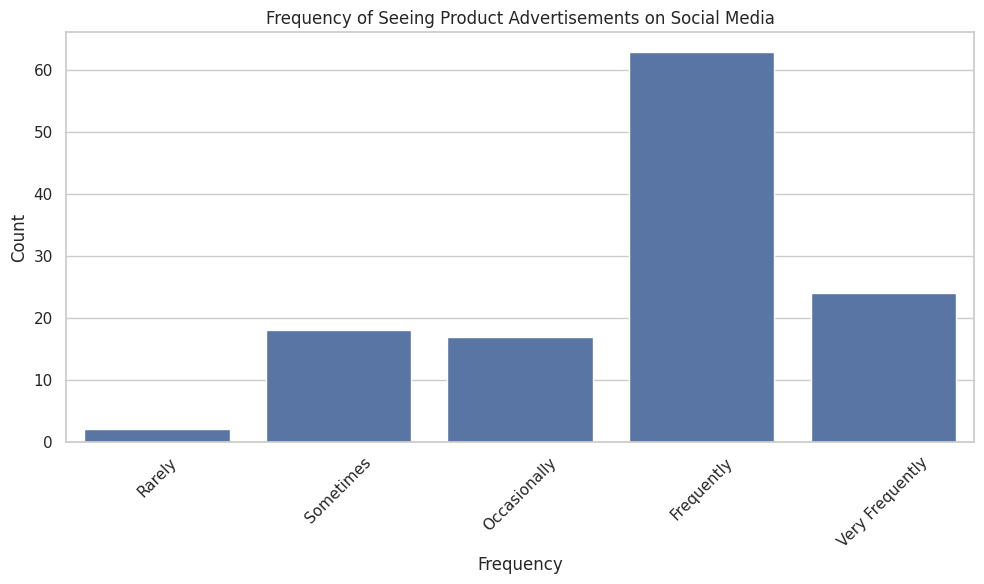

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(data=socmed_df, x='How often do you see product advertisements or promotions on social media?', order=[
    'Rarely', 'Sometimes', 'Occasionally', 'Frequently', 'Very Frequently'])
plt.title("Frequency of Seeing Product Advertisements on Social Media")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Purchase Regret

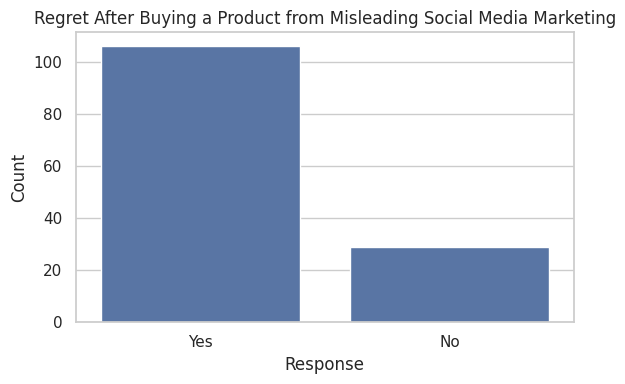

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=socmed_df, x='Have you ever regretted buying a product because of misleading social media marketing?')
plt.title("Regret After Buying a Product from Misleading Social Media Marketing")
plt.xlabel("Response")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

3. Correlation Heatmap

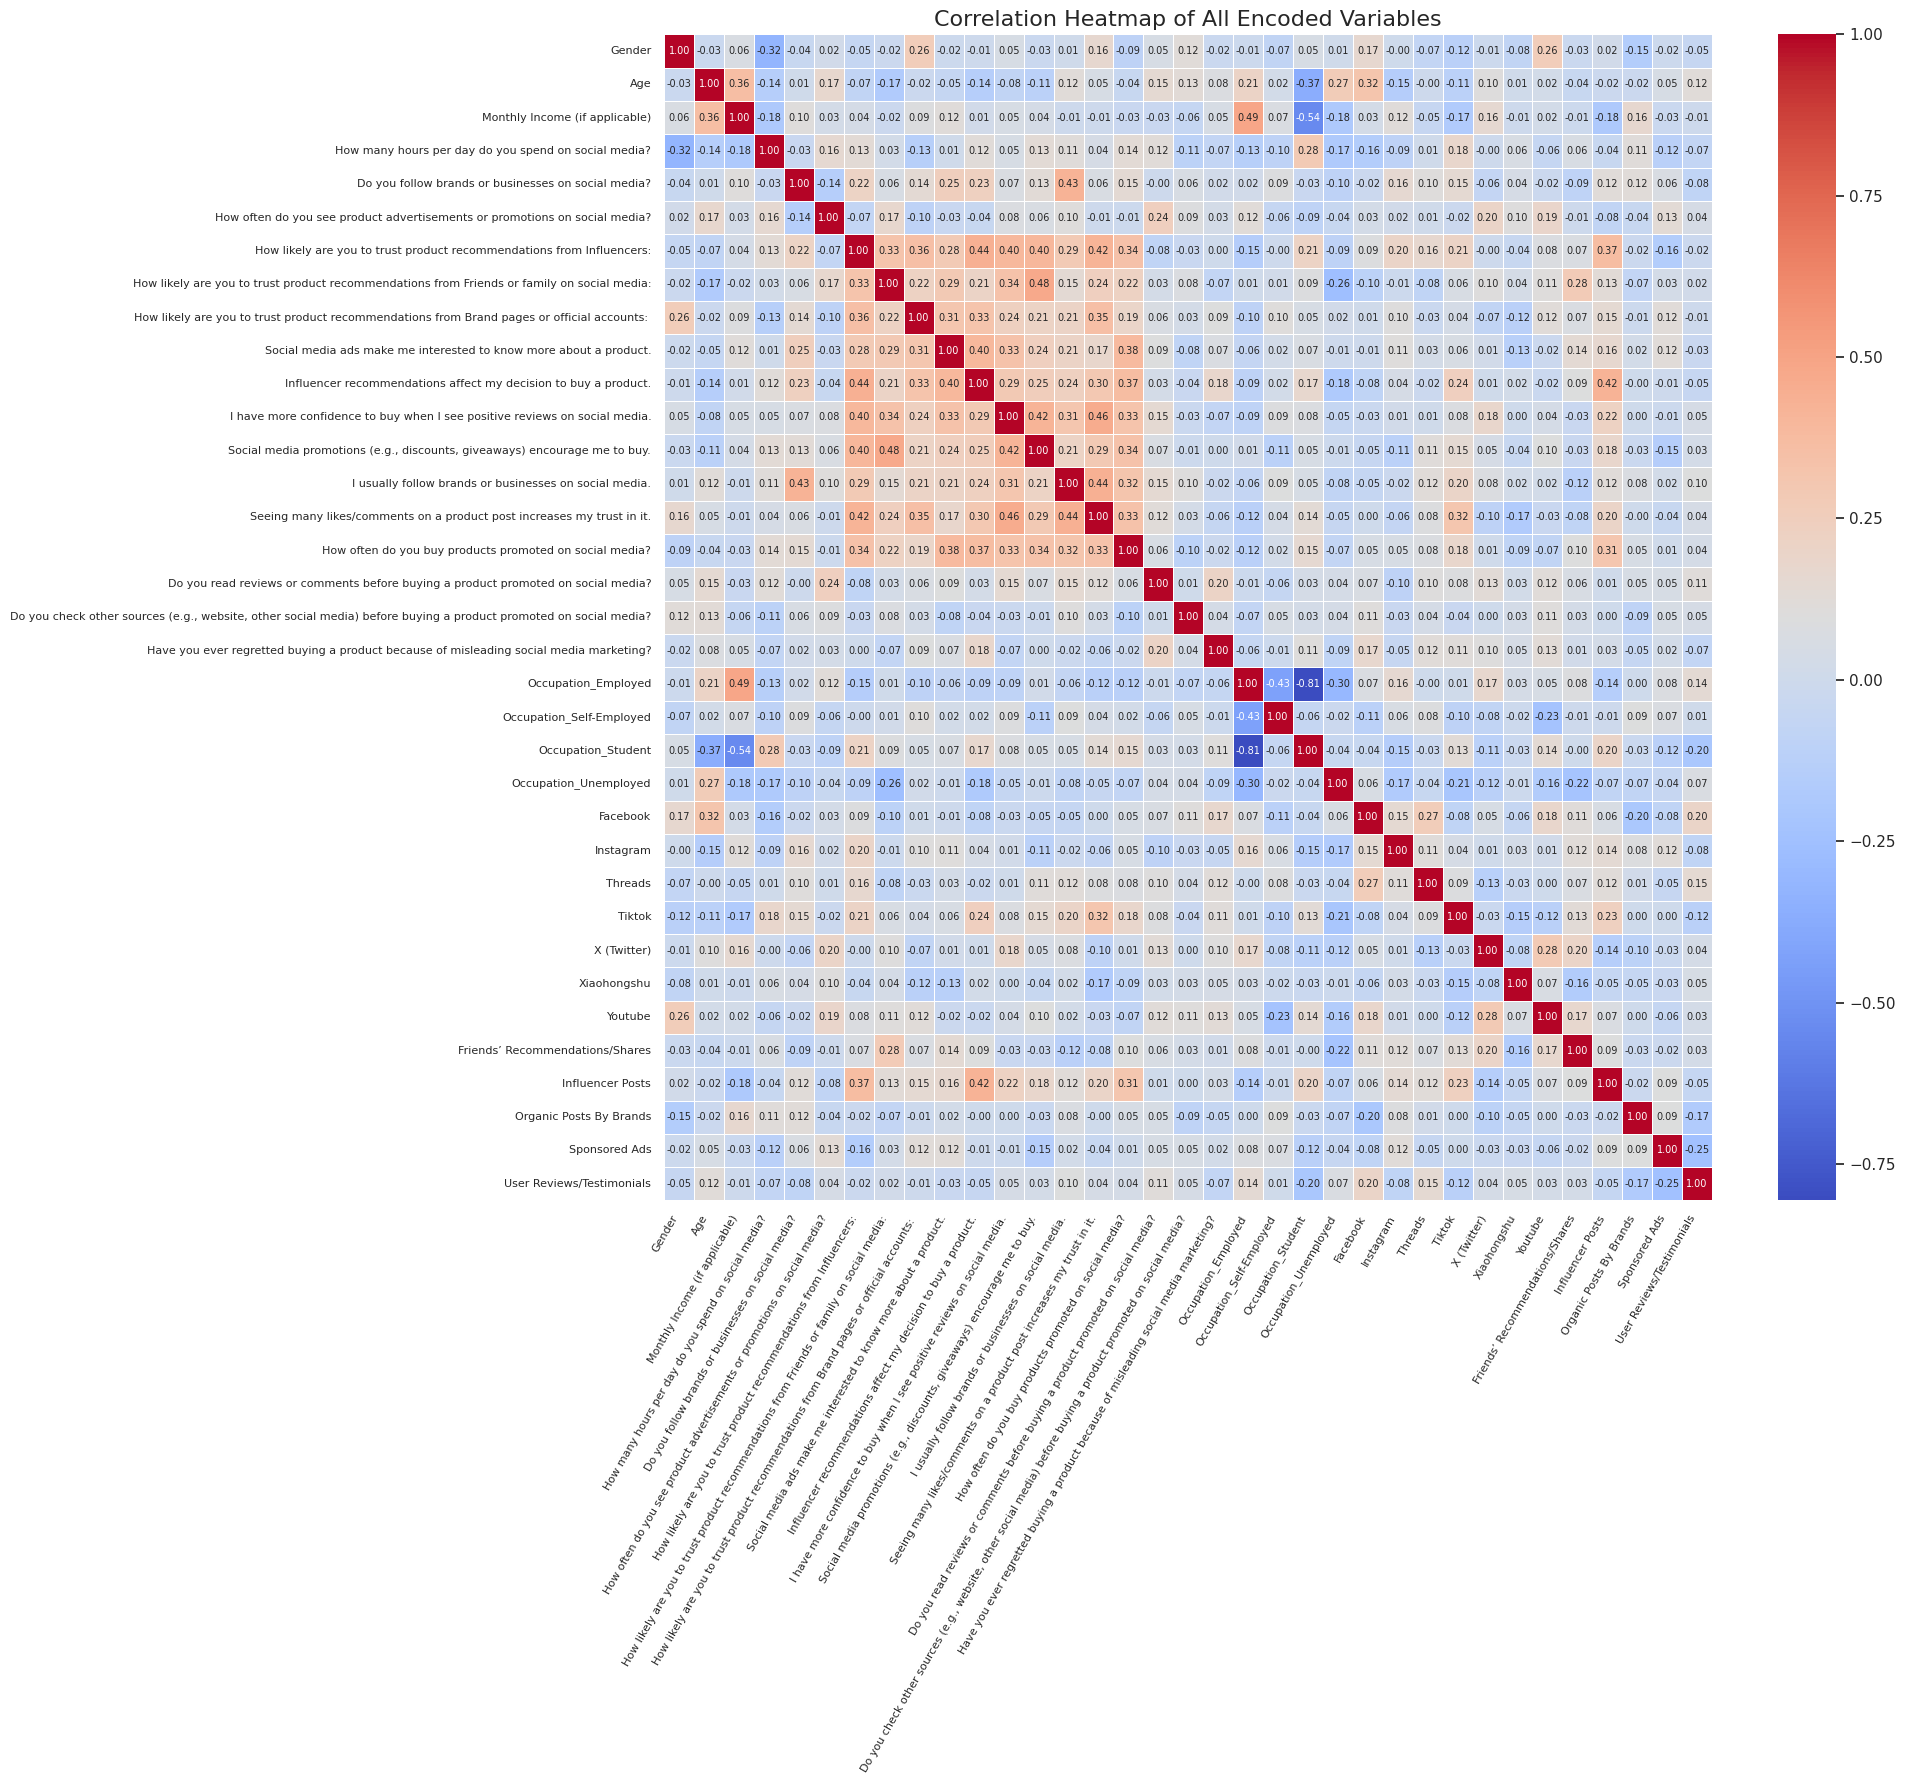

In [ ]:
corr_matrix = impact_df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 7}
)

plt.title("Correlation Heatmap of All Encoded Variables", fontsize=16)
plt.xticks(rotation=60, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

4. Gender vs Confidence

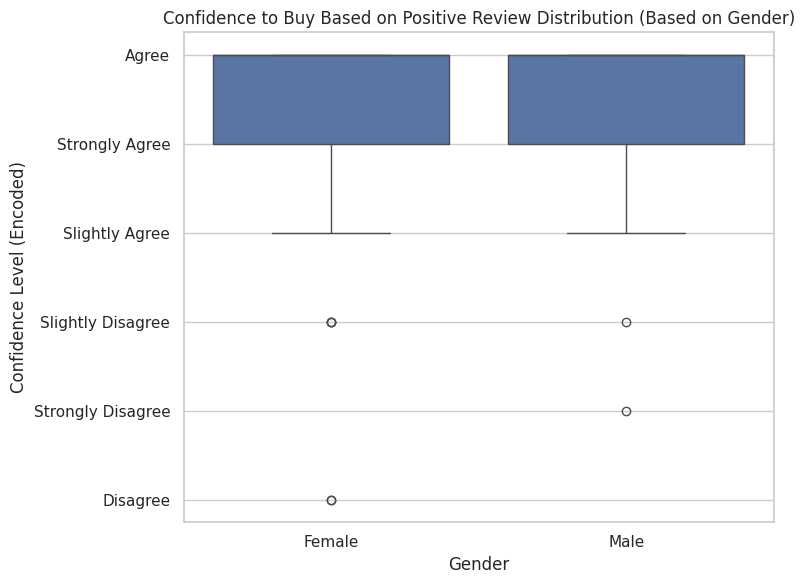

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=socmed_df['Gender'], y=socmed_df['I have more confidence to buy when I see positive reviews on social media.'])
plt.title("Confidence to Buy Based on Positive Review Distribution (Based on Gender)")
plt.xlabel("Gender")
plt.ylabel("Confidence Level (Encoded)")
plt.tight_layout()
plt.show()

5. Social Media Platform Usage

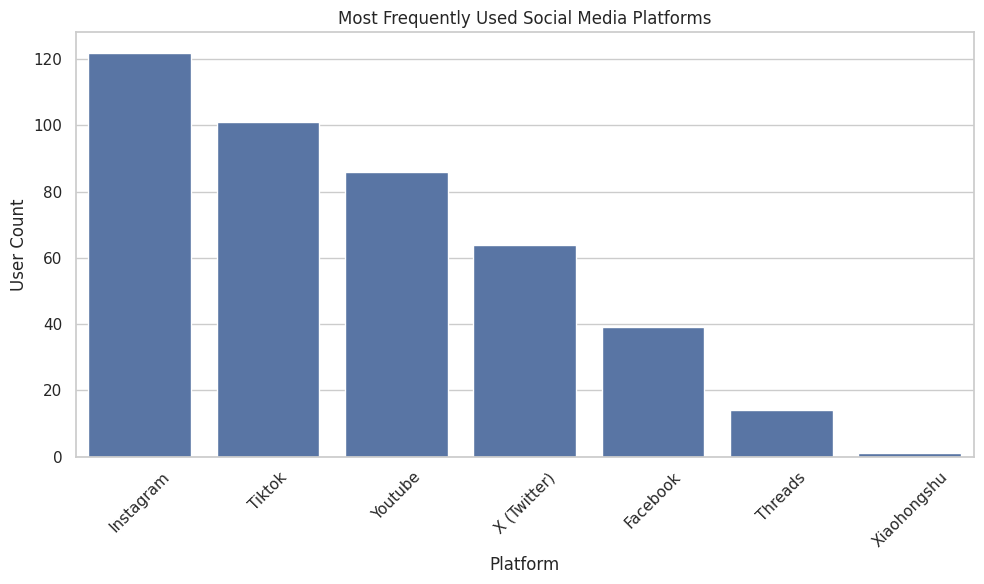

In [ ]:
platform_totals = platform_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_totals.index, y=platform_totals.values)
plt.title("Most Frequently Used Social Media Platforms")
plt.xlabel("Platform")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Regret vs Buying Frequency

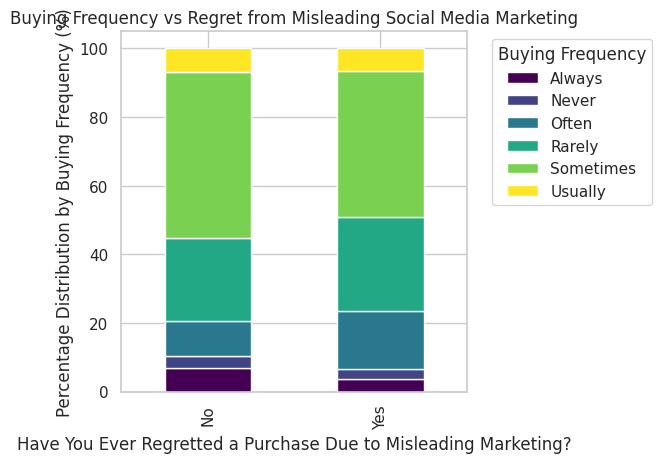

In [ ]:
cross_tab = pd.crosstab(socmed_df['Have you ever regretted buying a product because of misleading social media marketing?'],
                        socmed_df['How often do you buy products promoted on social media?'],
                        normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Buying Frequency vs Regret from Misleading Social Media Marketing")
plt.ylabel("Percentage Distribution by Buying Frequency (%)")
plt.xlabel("Have You Ever Regretted a Purchase Due to Misleading Marketing?")
plt.legend(title='Buying Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

7. Most Influential Content Types

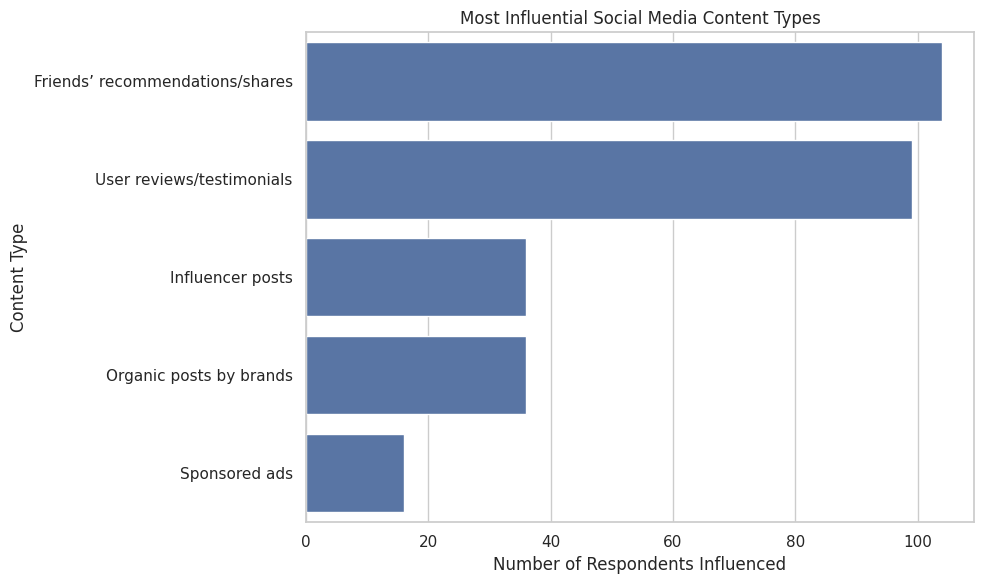

In [ ]:
content_split = socmed_df['Which type of social media content influences you most?'].str.split(', ')
mlb2 = MultiLabelBinarizer()
content_df = pd.DataFrame(mlb2.fit_transform(content_split), columns=[c.strip() for c in mlb2.classes_])
content_totals = content_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=content_totals.values, y=content_totals.index)
plt.title("Most Influential Social Media Content Types")
plt.xlabel("Number of Respondents Influenced")
plt.ylabel("Content Type")
plt.tight_layout()
plt.show()

8. Trust in Product Recommendations

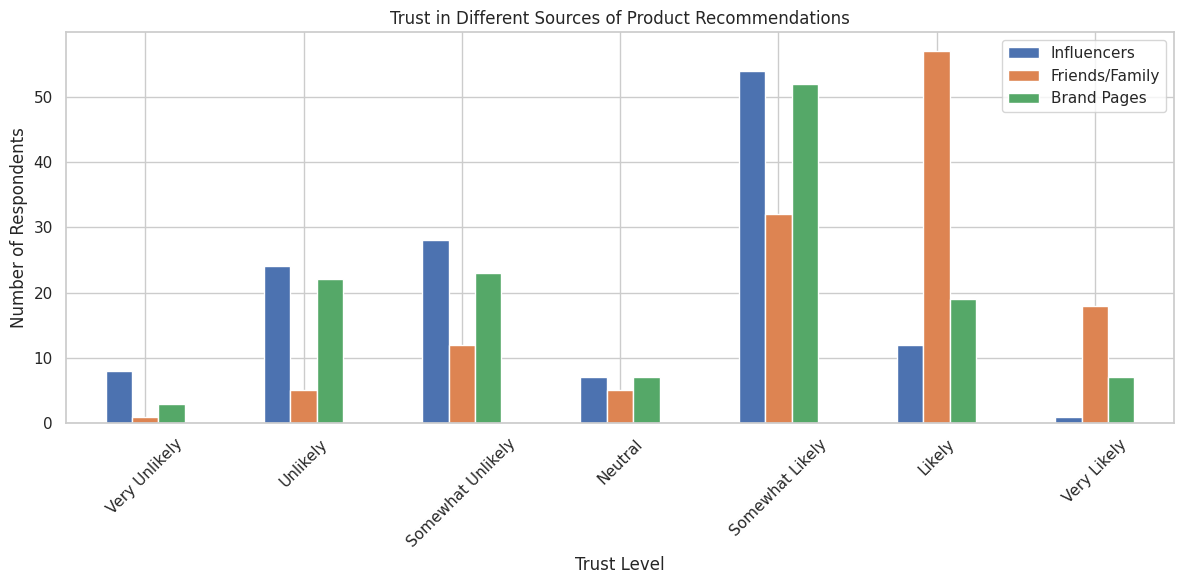

In [ ]:
trust_cols = {
    'Influencers': 'How likely are you to trust product recommendations from Influencers:',
    'Friends/Family': 'How likely are you to trust product recommendations from Friends or family on social media:',
    'Brand Pages': 'How likely are you to trust product recommendations from Brand pages or official accounts: '
}
trust_df = pd.DataFrame({k: socmed_df[v].value_counts().reindex([
    'Very Unlikely', 'Unlikely', 'Somewhat Unlikely', 'Neutral',
    'Somewhat Likely', 'Likely', 'Very Likely']) for k, v in trust_cols.items()})
trust_df.plot(kind='bar', figsize=(12, 6))
plt.title("Trust in Different Sources of Product Recommendations")
plt.ylabel("Number of Respondents")
plt.xlabel("Trust Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. Buying Frequency

In [ ]:
buy_freq_counts = socmed_df['How often do you buy products promoted on social media?'].value_counts().reindex([
    'Never', 'Rarely', 'Sometimes', 'Often', 'Usually', 'Always'])


plt.figure(figsize=(8, 8))
plt.pie(
    buy_freq_counts,
    labels=buy_freq_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:6]
)
plt.title("Buying Frequency of Products Promoted on Social Media")
plt.axis('equal')
plt.tight_layout()
plt.show()

11. Gender vs Buying Frequency

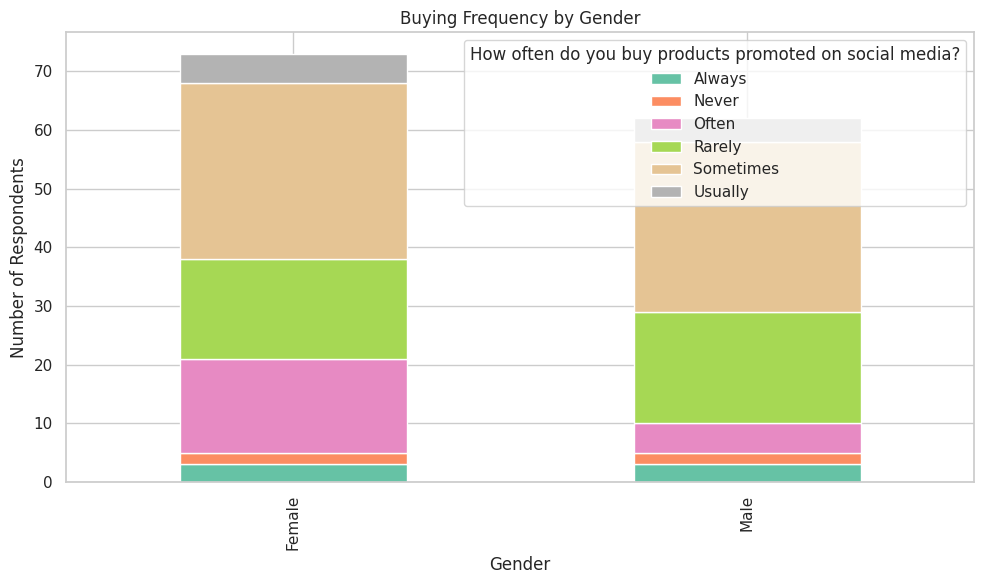

In [ ]:
pd.crosstab(socmed_df['Gender'], socmed_df['How often do you buy products promoted on social media?']).plot(
    kind='bar', stacked=True, colormap='Set2', figsize=(10,6))
plt.title("Buying Frequency by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

12. Social Media Platforms Used by Respondents (Treemap)

In [ ]:
pip install squarify

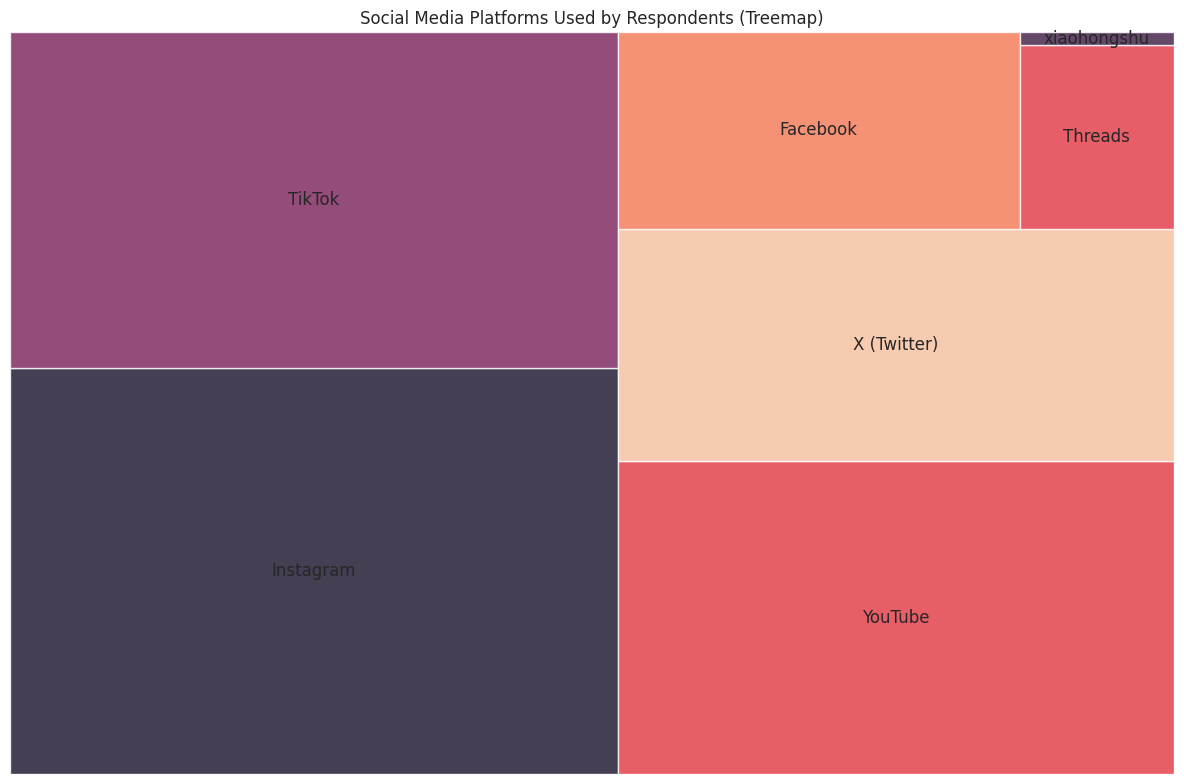

In [ ]:
import squarify
import matplotlib.pyplot as plt


platform_split = socmed_df['Social Media Platforms You Use Regularly (tick all that apply)'].str.split(', ')
mlb = MultiLabelBinarizer()
platform_df = pd.DataFrame(mlb.fit_transform(platform_split), columns=mlb.classes_)
platform_totals = platform_df.sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
squarify.plot(sizes=platform_totals.values, label=platform_totals.index, alpha=0.8)
plt.title("Social Media Platforms Used by Respondents (Treemap)")
plt.axis('off')
plt.tight_layout()
plt.show()


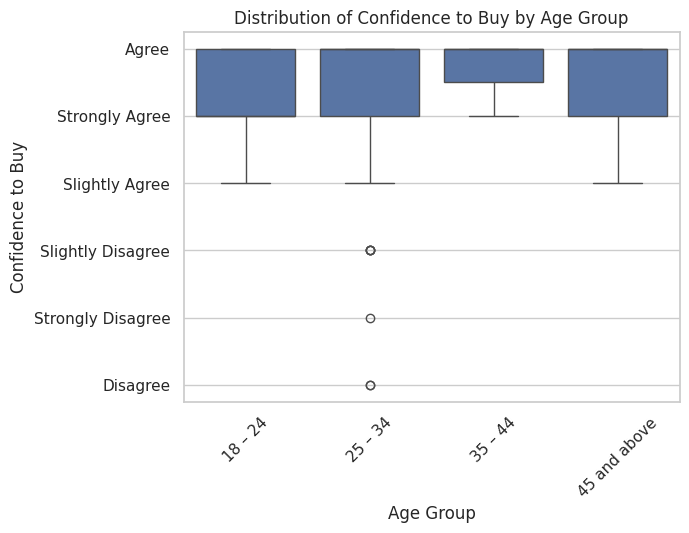

In [ ]:
sns.boxplot(x=socmed_df['Age'], y=socmed_df['I have more confidence to buy when I see positive reviews on social media.'])
plt.title("Distribution of Confidence to Buy by Age Group")
plt.ylabel("Confidence to Buy")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


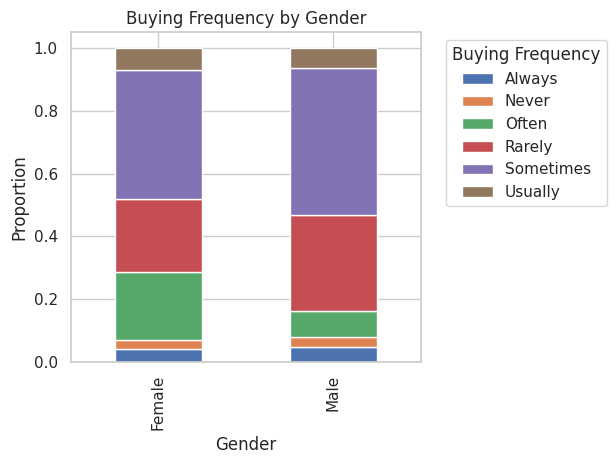

In [ ]:
pd.crosstab(socmed_df['Gender'], socmed_df['How often do you buy products promoted on social media?'], normalize='index') \
  .plot(kind='bar', stacked=True)

plt.title('Buying Frequency by Gender')
plt.ylabel('Proportion')
plt.legend(title='Buying Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Statistical Tests

## **Independent Samples T-Test (for gender group)**


> Do males and females differ in their confidence to buy after seeing positive reviews?



In [ ]:
print(impact_df['Gender'].value_counts())


In [ ]:
print(impact_df['I have more confidence to buy when I see positive reviews on social media.'].value_counts())

In [ ]:
print(socmed_df[socmed_df['Gender'] == 'Male']['I have more confidence to buy when I see positive reviews on social media.'].unique())

In [ ]:
print(socmed_df[socmed_df['Gender'] == 'Female']['I have more confidence to buy when I see positive reviews on social media.'].unique())

In [ ]:
print(impact_df[impact_df['Gender'] == 1]['I have more confidence to buy when I see positive reviews on social media.'].unique())

In [ ]:
print(impact_df[impact_df['Gender'] == 0]['I have more confidence to buy when I see positive reviews on social media.'].unique())

In [ ]:
from scipy.stats import ttest_ind

male_scores = impact_df[impact_df['Gender'] == 1]['I have more confidence to buy when I see positive reviews on social media.']
female_scores = impact_df[impact_df['Gender'] == 0]['I have more confidence to buy when I see positive reviews on social media.']


t_stat, p_val = ttest_ind(male_scores, female_scores, nan_policy='omit')
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")


In [ ]:
print("Male mean:", male_scores.mean())
print("Female mean:", female_scores.mean())

Welch–Satterthwaite & Consumer Degrees of Freedom

In [ ]:
n1 = len(male_scores)
n2 = len(female_scores)
s1 = np.var(male_scores, ddof=1)
s2 = np.var(female_scores, ddof=1)

# Welch–Satterthwaite equation
df = (s1/n1 + s2/n2)**2 / (
     ((s1**2)/((n1**2)*(n1 - 1))) +
     ((s2**2)/((n2**2)*(n2 - 1)))
)

print("Welch–Satterthwaite degrees of freedom:", round(df, 2))

In [ ]:
# Calculate degrees of freedom for Consumer's t-test
n1 = len(male_scores)
n2 = len(female_scores)

df_consumer = n1 + n2 - 2

print("Consumer’s t-test degrees of freedom:", df_consumer)

Welch–Satterthwaite & Consumer test score and p-value

In [ ]:
# Consumer’s t-test: equal variances assumed
t_stat_consumer, p_consumer = ttest_ind(male_scores, female_scores, equal_var=True)

# Show results
print("Consumer's t-test (equal variance):")
print(f"  t = {t_stat_consumer:.3f}, p = {p_consumer:.4f}")

In [ ]:
# Welch’s t-test: unequal variances assumed (default)
t_stat_welch, p_welch = ttest_ind(male_scores, female_scores, equal_var=False)

print("\nWelch’s t-test (unequal variance):")
print(f"  t = {t_stat_welch:.3f}, p = {p_welch:.4f}")

In [ ]:
from scipy.stats import levene

stat, p_levene = levene(male_scores, female_scores, center='mean')

print(f"Levene’s test statistic: {stat:.3f}")
print(f"Levene’s test p-value: {p_levene:.4f}")

**Statistical Summary**

| Test |	T-Statistic	| p-Value |	Degrees of Freedom | Conclusion |
|------|--------------|---------|--------------------|------------|
| Consumer’s t-test	| 0.621	| 0.5356	| 133	| No significant difference |
| Welch’s t-test	| 0.626	| 0.5323 |	132.47	| No significant difference |
| Levene’s Test |	0.609	| 0.4367 |	— |	Variances are equal |


> Levene’s test (p = 0.437) shows no significant difference in variance, so you could safely use Consumer’s t-test.

> However, Welch’s t-test is still more robust in real-world survey data, and it produced nearly identical results.

✅ **Conclusion:** Either test is appropriate here, and both support the same interpretation.

**Comparison of Male vs Female Confidence**
* Both Consumer’s and Welch’s t-tests show no statistically significant difference in confidence scores.
* Mean confidence (Likert-encoded):

  * Males: ~5.03 (≈ “Agree”)
  * Females: ~4.92 (≈ “Agree”)

✅ **Conclusion:** Gender does not significantly affect consumer confidence in buying after seeing positive reviews on social media.

## **T-test / z-score / ANOVA (for age group)**
Null Hypothesis (H₀): There is no significant difference in consumer buying confidence across different age groups when exposed to positive reviews on social media.

Alternative Hypothesis (H₁): There is a significant difference in consumer buying confidence across different age groups when exposed to positive reviews on social media.

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

df = socmed_df
# Clean the column name for easier use
df.columns = [col.strip() for col in df.columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# Check counts for each age group
age_counts = df['I have more confidence to buy when I see positive reviews on social media.'].value_counts().sort_index()
print(age_counts)


In [ ]:
# Combine small age groups
df['Age_Group_Collapsed'] = df['Age'].replace({
    '35 – 44': '35 and above',
    '45 and above': '35 and above'
})
print(df['Age_Group_Collapsed'].value_counts())


In [ ]:
# Rename the column for easier access (if needed)
df = df.rename(columns={"I have more confidence to buy when I see positive reviews on social media.": "Confidence"})

likert_mapping = {
    "Disagree": 1,
    "Slightly Disagree": 2,
    "Strongly Disagree": 3,
    "Agree": 4,
    "Slightly Agree": 5,
    "Strongly Agree": 6
}

['Disagree' 'Slightly Disagree' 'Strongly Disagree' 'Agree'
 'Slightly Agree' 'Strongly Agree']

df["Confidence"] = df["Confidence"].map(likert_mapping)


In [ ]:
# Normality Test Results (Shapiro-Wilk
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt


# Separate the groups
group_18_24 = df[df['Age_Group_Collapsed'] == '18 – 24']['Confidence']
group_25_34 = df[df['Age_Group_Collapsed'] == '25 – 34']['Confidence']
group_35_above = df[df['Age_Group_Collapsed'] == '35 and above']['Confidence']

# Shapiro-Wilk Test for Normality
results = {
    "18–24": shapiro(group_18_24),
    "25–34": shapiro(group_25_34),
    "35 and above": shapiro(group_35_above)
}

# Convert results to DataFrame
shapiro_df = pd.DataFrame({
    "Age Group": results.keys(),
    "W Statistic": [res.statistic for res in results.values()],
    "P-Value": [res.pvalue for res in results.values()]
})

# Display readable results
print("Normality Test Results (Shapiro-Wilk):\n")
for group, res in results.items():
    print(f"{group}: W = {res.statistic:.3f}, p = {res.pvalue:.5f}")


In [ ]:
# Kruskal-Wallis H-statistis test due to distribution not meeting normality required
from scipy.stats import kruskal

stat, p = kruskal(group_18_24, group_25_34, group_35_above)
print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Result: Significant difference between at least one age group.")
else:
    print("Result: No significant difference between age groups.")


## **Hypothesis 5-ANOVA**

H5: There is significant difference in the impact of various social media platforms (e.g., Instagram, Facebook, TikTok) on consumer buying decisions.
- testing if buying decisions are independent of platform choice

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df = impact_df

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Social media platforms
platform_cols = ['Facebook', 'Instagram', 'Threads', 'Tiktok', 'X (Twitter)', 'Xiaohongshu', 'Youtube']

# These columns measure different aspects of how social media impacts buying decisions
impact_cols = [
    'How often do you buy products promoted on social media?',
    'Social media ads make me interested to know more about a product.',
    'Influencer recommendations affect my decision to buy a product.',
    'I have more confidence to buy when I see positive reviews on social media.',
    'Social media promotions (e.g., discounts, giveaways) encourage me to buy.',
    'Seeing many likes/comments on a product post increases my trust in it.'
]

# Create a composite score for overall impact on buying decisions
# # Dependent variable
df['buying_impact_score'] = df[impact_cols].mean(axis=1)

# ANOVA
# We need to reshape the data so that each row represents a person-platform combination
anova_data = []

for idx, row in df.iterrows():
    for platform in platform_cols:
        if row[platform] == 1:  # If person uses this platform
            anova_data.append({
                'person_id': idx,
                'platform': platform,
                'buying_impact_score': row['buying_impact_score']
            })

# Convert to DataFrame
anova_df = pd.DataFrame(anova_data)

# Perform one-way ANOVA
platforms = anova_df['platform'].unique()
groups = [anova_df[anova_df['platform'] == platform]['buying_impact_score'] for platform in platforms]

# Normality test for each group
print("\n1. Normality Tests (Shapiro-Wilk):")
for platform, group in zip(platforms, groups):
    if len(group) >= 3:  # Shapiro-Wilk requires at least 3 samples
        stat, p = stats.shapiro(group)
        print(f"   {platform}: W={stat:.4f}, p={p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

# Homogeneity of variances (Levene's test)
print("\n2. Homogeneity of Variances (Levene's Test):")
stat, p = stats.levene(*groups)
print(f"   W={stat:.4f}, p={p:.4f} {'(Equal variances)' if p > 0.05 else '(Unequal variances)'}")

# Perform ANOVA
print("\n\nOne-Way ANOVA Results:")
f_stat, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")




1. Normality Tests (Shapiro-Wilk):
   Facebook: W=0.9380, p=0.0327 (Not Normal)
   Instagram: W=0.9612, p=0.0014 (Not Normal)
   Tiktok: W=0.9339, p=0.0001 (Not Normal)
   X (Twitter): W=0.9119, p=0.0002 (Not Normal)
   Youtube: W=0.9291, p=0.0002 (Not Normal)
   Threads: W=0.9801, p=0.9752 (Normal)

2. Homogeneity of Variances (Levene's Test):
   W=1.2194, p=0.2950 (Equal variances)


One-Way ANOVA Results:
F-statistic: 0.6528
p-value: 0.6879


FAIL TO REJECT the null hypothesis with P value(0.6528) > 0.05.There is NO significant difference in the impact of various social media platforms (Facebook, Instagram, TikTok, X/Twitter, YouTube, Threads) on consumer buying decisions.
However, in Normality test most platforms failed the normality test (except Threads), which is a violation of ANOVA assumptions, but we assume it is normal due to lack of quantity of sample.
Homogeneity of Variances passed with p = 0.2950, indicating equal variances across groups

## **Spearman's Rank Correlation Test**

H3: Consumer engagement with social media marketing content (e.g., likes, reviews, comments) is positively correlated with their likelihood to purchase the advertised product.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Compute correlation matrix
corr = impact_df.corr(numeric_only=True, method='spearman')

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up figure size dynamically based on number of features
fig_size = max(10, len(corr.columns) * 0.7)
plt.figure(figsize=(fig_size, fig_size))

# Set theme
sns.set_theme(style="white")

# Plot the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    xticklabels=True,
    yticklabels=True
)

# Improve tick label appearance
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Spearman Correlation Heatmap", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Null Hypothesis: There no is significant correlation
# Alternate Hypothesis: There is a signficant correlation

# Predetermined confidence interval of 95%, the alpha-value is 0.05
alpha = 0.05

# Predictor Variables
x1 = 'Seeing many likes/comments on a product post increases my trust in it.'
x2 = 'I have more confidence to buy when I see positive reviews on social media.'

x_vars = [x1,x2]
y_var = 'How often do you buy products promoted on social media?'

x_vars_str = ', '.join(x_vars)
print(f"Running correlation tests for: {x_vars_str}\n\n")

for x in x_vars:
    corr, p = spearmanr(impact_df[x], impact_df[y_var])
    print(f"{x} vs {y_var}:\n")
    print(f"Significance level (alpha): {alpha}\n")
    print(f"Correlation coefficient: {corr:.3f}\n")
    print(f"P-value: {p:.5f}\n")
    if p < alpha:
        print("P-value less than alpha. Reject the null hypothesis – significant correlation exists.\n\n")
    else:
        print("P-value less than alpha. Accept the null hypothesis – no significant correlation.\n\n")


Analysis the correlation heatmap & hypothesis test:

Target Variable: 'How often do you buy products promoted on social media?' (**Likelihood of Purchase**)


Predictor Variables(s):
1. 'Seeing many **likes/comments** in a product post increases my trust in it'. Correlation Coefficient: **0.37** and **p-value (0.00004) < alpha (0.05)**
2. 'I have more confidence to buy when I see positive **reviews** on social media'. Correlation Coefficient: **0.332** and **p-value (0.00024) < alpha (0.05)**




Conclusion: There is a positive correlation between the consumers engagement with the social media marketing content (e.g.likes, reviews, comments, etc.)  to their likelihood to purchase the product. Hence, **the hypothesis (H3) is accepted**.



## **Regression**

H2: Social media marketing has a significant positive impact on consumer buying decisions.

The best target variable that reflect Social Media marketing influence on Consumer buying decision is:

'How often do you buy products promoted on social media?'.

To test H4, we run 2 Regression models:
  - Linear Regression
  - Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Choose target
target = 'How often do you buy products promoted on social media?'

# Define features and target
X = impact_df.drop(columns=[target, 'High_Purchaser'])
y = impact_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 1. Multiple Linear Regression Model
# --------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Linear Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# --------------------------
# 2. Random Forest Regressor
# --------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# --------------------------
# 3. Feature Importance (Random Forest)
# --------------------------
print("\n🔹 Feature Importance (Random Forest): \n")
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(20, 6), title="Top 15 Features")
plt.tight_layout()
plt.show()


The regression analysis indicates that the Linear Regression model performed poorly, with a negative R² value (-0.21), suggesting it was unable to explain the variability in the target variable. In contrast, the Random Forest model achieved a moderate improvement, with an R² of 0.25 and a lower RMSE of 1.01, indicating a better fit due to its ability to capture nonlinear relationships. However, the overall predictive performance remains limited. This is likely due to the relatively small sample size and the subjective nature of the target variable — “How often do you buy products promoted on social media?” — which may be influenced by numerous unobserved or external factors not captured in the dataset.

Despite the modest R², the feature importance analysis from the Random Forest model reveals useful insights. The most influential predictors included following brands on social media, interest in advertisements, trust in influencer recommendations, and time spent on social platforms. These findings suggest that user engagement and perceived credibility are key factors associated with social media-driven purchasing behavior. While the model's accuracy is limited, the results still offer valuable direction for understanding which behavioral factors are most relevant to predicting consumer responses to social media marketing.